# CSCI316 Individual Assignment 1
# Thawdar Swe Zin
## (Task 1)
---


In [1]:
import pandas as pd 
import numpy as np
import io
import matplotlib.pyplot as plt

### 1( Creating one Pandas dataframe for both the training and test data

In [2]:
# Creating dataframes
churnTest_df = pd.read_csv("customer_churn_dataset-testing-master.csv")
churnTrain_df = pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
# combine two dataframe
churn_df = pd.concat([churnTest_df, churnTrain_df], ignore_index=True, sort=False)

In [4]:
# first 5 row of dataset
churn_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


### 2( Identifing missing values. Proposing a method to clean the missing value

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [6]:
churn_df.shape

(505207, 12)

In [7]:
# finding the number of null values
churn_df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

**Findings:**
> Based on the above data, there are a total of 505207 entries in the dataset.

> All 12 columns contain 505206 non-null values.

> Thus, each column has one null value.

In [8]:
# create a new dataframe which has only null data
null_df = churn_df[churn_df.isna().any(axis=1)]
null_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
263669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Findings:**
> The resulted data shows that a single row has all null entries. Thus, we remove that empty row.


In [9]:
# removing null row
churn_df = churn_df.dropna()

In [10]:
# finding if null value left
churn_df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

### 3( Perform z-score normalization of the values in the attribute "Last Interaction". Show the mean and variance of the normalized scores.

In [11]:
# adding a new column, Last Interaction Z-Score , to the churn_df
# calculate the z scores using the formula
churn_df['Last Interaction Z-Score'] = (churn_df['Last Interaction'] - churn_df['Last Interaction'].mean()) / churn_df['Last Interaction'].std()

In [12]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CustomerID                505206 non-null  float64
 1   Age                       505206 non-null  float64
 2   Gender                    505206 non-null  object 
 3   Tenure                    505206 non-null  float64
 4   Usage Frequency           505206 non-null  float64
 5   Support Calls             505206 non-null  float64
 6   Payment Delay             505206 non-null  float64
 7   Subscription Type         505206 non-null  object 
 8   Contract Length           505206 non-null  object 
 9   Total Spend               505206 non-null  float64
 10  Last Interaction          505206 non-null  float64
 11  Churn                     505206 non-null  float64
 12  Last Interaction Z-Score  505206 non-null  float64
dtypes: float64(10), object(3)
memory usage: 54.0+ MB


In [13]:
churn_df.iloc[:10, 10:]

,Last Interaction,Churn,Last Interaction Z-Score
0,9.0,1.0,-0.651765
1,20.0,0.0,0.626073
2,21.0,0.0,0.742241
3,18.0,0.0,0.393739
4,18.0,0.0,0.393739
5,29.0,0.0,1.671578
6,14.0,1.0,-0.070929
7,16.0,0.0,0.161405
8,8.0,0.0,-0.767932
9,10.0,0.0,-0.535598


In [14]:
# view mean, variance and standard deviation
print("Mean: ", np.mean(churn_df['Last Interaction Z-Score']))
print("Variance: ", np.var(churn_df['Last Interaction Z-Score']))
print("Standard deviation: ", np.std(churn_df['Last Interaction Z-Score']))

Mean:  -6.188343046884718e-17
Variance:  0.9999980206094145
Standard deviation:  0.9999990103042175


**Findings:**
> As the standard deviation of the dataset is close to 1, the data are quite clean to proceed and we do not expect to see so much deviation.

### 4( Create 5 bins for the attribute "Total Spend" such that the bins contain (approximately) equivalent numbers of records.
---

> To create the bins that contain (approximately) equivalent numbers of records, binning by frequency is used as it calculates the size of each bin so that each bin contains the (almost) same number of observations.

In [16]:
# define labels
quatileLabels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# apply qcut
churn_df['Total Spend (bins)'] = pd.qcut(churn_df['Total Spend'], q=5, precision=1, labels=quatileLabels)

In [17]:
churn_df.value_counts()

CustomerID  Age   Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  Last Interaction Z-Score  Total Spend (bins)
1.0         22.0  Female  25.0    14.0             4.0            27.0           Basic              Monthly          598.00       9.0               1.0    -0.651765                 Q3                    1
279556.0    47.0  Male    10.0    14.0             3.0            8.0            Basic              Quarterly        788.57       16.0              0.0     0.161405                 Q4                    1
279554.0    21.0  Male    38.0    1.0              1.0            16.0           Basic              Quarterly        534.20       26.0              0.0     1.323076                 Q2                    1
279553.0    38.0  Male    57.0    26.0             3.0            1.0            Premium            Quarterly        681.20       1.0               0.0    -1.581102                 Q3  

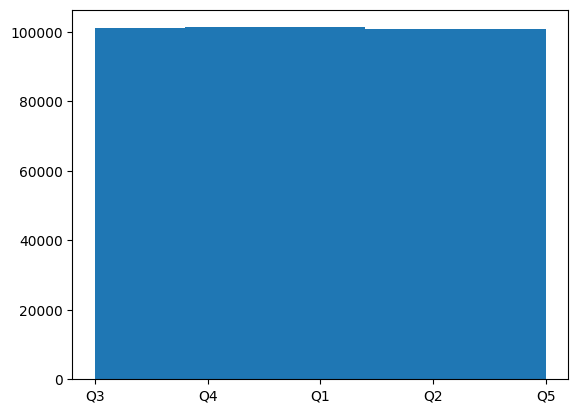

In [18]:
# display the frequency of each quartile
plt.hist(churn_df['Total Spend (bins)'], bins=5)
plt.show()

> According to the above diagram, all bins consist of approximately same numbers of values.

In [19]:
churn_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Last Interaction Z-Score
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,5.052060e+05
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203,-6.188343e-17
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944,1.000000e+00
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,-1.581102e+00
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000,-8.840994e-01
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000,-7.092940e-02
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000,8.584077e-01
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,1.787745e+00


### 5( Appling one-hot-encoding to the attribute "Contract Length"

In [20]:
# To see unique elements form the 'Contract Length' column
print(churn_df['Contract Length'].unique())

['Monthly' 'Annual' 'Quarterly']


In [21]:
churn_df['Contract Length'].value_counts()

Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64

In [22]:
# use get_dummies() method to create one-hot encoding
one_hot_encoded_data = pd.get_dummies(churn_df['Contract Length'], prefix='Contract Length', )
one_hot_encoded_data

,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
...,...,...,...
505202,True,False,False
505203,True,False,False
505204,False,False,True
505205,False,False,True


In [23]:
# add the encoded df into the original df
churn_df['ContractLength_Annual'] = one_hot_encoded_data.iloc[:,0]
churn_df['ContractLength_Monthly'] = one_hot_encoded_data.iloc[:,1]
churn_df['ContractLength_Quarterly'] = one_hot_encoded_data.iloc[:,2]

# show df
churn_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Last Interaction Z-Score,Total Spend (bins),ContractLength_Annual,ContractLength_Monthly,ContractLength_Quarterly
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0,-0.651765,Q3,False,True,False
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0,0.626073,Q3,False,True,False
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0,0.742241,Q4,True,False,False
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0,0.393739,Q1,False,False,True
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0,0.393739,Q2,True,False,False


### 6( Define at least one new attribute based on existing attribute, and explain your reason behind your definition.

In [31]:
# Finding correlation
churn_df['Churn'].corr(churn_df['Age'])

0.19122405196207382

In [33]:
churn_df['Churn'].corr(churn_df['Tenure'])

-0.021307873757210955

In [34]:
churn_df['Churn'].corr(churn_df['Usage Frequency'])

-0.053263037157565765

In [35]:
churn_df['Churn'].corr(churn_df['Support Calls'])

0.5162833275696741

In [36]:
churn_df['Churn'].corr(churn_df['Payment Delay'])

0.3297849204419376

In [37]:
churn_df['Churn'].corr(churn_df['Total Spend'])

-0.36968154143166315

> Based on the above correlations, the correlation between "Churn" and "Support Calls" has the highest value. 
> Therefore, a new attribute is derived from "Support Calls" attribute.

<Axes: ylabel='Frequency'>

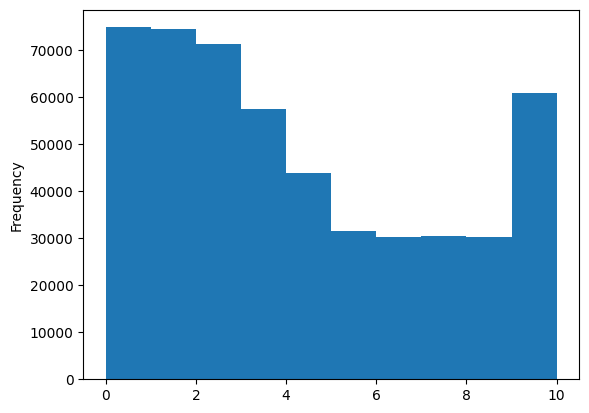

In [26]:
# plot a histogram for 'Support Calls'
churn_df['Support Calls'].plot(kind='hist')

**Finding:**
> After analysing the shown histogram, the frequency starts with over 70000 and continues to decrease significantly as the number of support cells become greater, except the frequency of 10 support calls, which unexpectedly climbs up to the number of approximately 60000. Although the overall frequency of support cells seems to drop down, the values are meant to stay almost constant at the range of support calls 5 to 9. Thus, a new attribute is generated from the ‘Support Calls’

In [38]:
# new attribute 'Support Calls less than 5' is derived from 'Support Calls'
churn_df['Support Calls less than 5'] = churn_df['Support Calls'] < 5

In [40]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   CustomerID                 505206 non-null  float64 
 1   Age                        505206 non-null  float64 
 2   Gender                     505206 non-null  object  
 3   Tenure                     505206 non-null  float64 
 4   Usage Frequency            505206 non-null  float64 
 5   Support Calls              505206 non-null  float64 
 6   Payment Delay              505206 non-null  float64 
 7   Subscription Type          505206 non-null  object  
 8   Contract Length            505206 non-null  object  
 9   Total Spend                505206 non-null  float64 
 10  Last Interaction           505206 non-null  float64 
 11  Churn                      505206 non-null  float64 
 12  Last Interaction Z-Score   505206 non-null  float64 
 13  Total Spend (bins) 

In [41]:
churn_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Last Interaction Z-Score,Total Spend (bins),ContractLength_Annual,ContractLength_Monthly,ContractLength_Quarterly,Support Calls less than 5
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0,-0.651765,Q3,False,True,False,True
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0,0.626073,Q3,False,True,False,False
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0,0.742241,Q4,True,False,False,True
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0,0.393739,Q1,False,False,True,False
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0,0.393739,Q2,True,False,False,False
